Load dataset

In [2]:
file_path="C:/Users/coolb/Desktop/SarBERT/GenerativeAI tweets.csv"

Before prerpocesssing

In [3]:
import pandas as pd

df = pd.read_csv(file_path)

print("Dataset Size:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nNull Entries:\n", df.isnull().sum())
print("\nFirst Few Rows:\n", df.head())

Dataset Size: (56221, 5)

Data Types:
 Unnamed: 0     int64
Datetime      object
Tweet Id       int64
Text          object
Username      object
dtype: object

Null Entries:
 Unnamed: 0    0
Datetime      0
Tweet Id      0
Text          0
Username      0
dtype: int64

First Few Rows:
    Unnamed: 0                   Datetime             Tweet Id  \
0           0  2023-04-19 21:27:19+00:00  1648800467206672384   
1           1  2023-04-19 21:27:09+00:00  1648800425540476929   
2           2  2023-04-19 21:26:57+00:00  1648800376479715328   
3           3  2023-04-19 21:26:49+00:00  1648800341193027584   
4           4  2023-04-19 21:25:00+00:00  1648799883934203905   

                                                Text       Username  
0  From Studio Gangster to Synthetic Gangster 🎤.....     resembleai  
1  Took me some time to find this. I build this #...  devaanparbhoo  
2  Mind blowing next wave #generativeai  platform...        timreha  
3  Open Source Generative AI Image Specialis

After preprocessing, we are cleaning here

In [4]:
import re
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

file_path = "C:/Users/coolb/Desktop/SarBERT/GenerativeAI tweets.csv"
df = pd.read_csv(file_path)

def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

df['cleaned_text'] = df['Text'].apply(clean_text)

print(df[['Text', 'cleaned_text']].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\coolb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                Text  \
0  From Studio Gangster to Synthetic Gangster 🎤.....   
1  Took me some time to find this. I build this #...   
2  Mind blowing next wave #generativeai  platform...   
3  Open Source Generative AI Image Specialist Sta...   
4  Are you an #HR leader considering which future...   

                                        cleaned_text  
0  studio gangster synthetic gangster investigate...  
1  took time find build nocode prototype dec real...  
2  mind blowing next wave generativeai platform c...  
3  open source generative ai image specialist sta...  
4  hr leader considering future trends prioritize...  


TERM FREQUENCY

In [5]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [6]:
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\coolb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\coolb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<Figure size 1000x800 with 0 Axes>

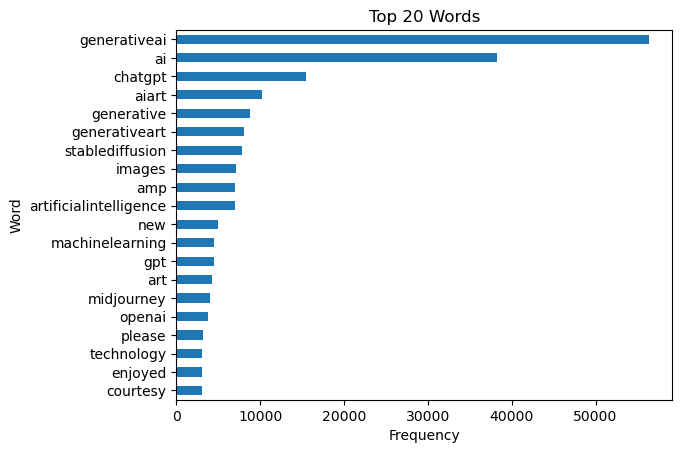

                      Word  Frequency
0             generativeai      56347
1                       ai      38247
2                  chatgpt      15406
3                    aiart      10171
4               generative       8825
5            generativeart       8093
6          stablediffusion       7854
7                   images       7144
8                      amp       6975
9   artificialintelligence       6945
10                     new       4986
11         machinelearning       4540
12                     gpt       4461
13                     art       4213
14              midjourney       4008
15                  openai       3765
16                  please       3231
17              technology       3076
18                 enjoyed       3073
19                courtesy       3058


In [7]:
def get_top_n_words(corpus, n=None):
    vec = Counter()
    for doc in corpus:
        vec.update(word_tokenize(doc))
    return vec.most_common(n)

top_20_words = get_top_n_words(df['cleaned_text'], 20)
df_top_20_words = pd.DataFrame(top_20_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 8))
df_top_20_words.plot(kind='barh', x='Word', y='Frequency', legend=False)
plt.title('Top 20 Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.gca().invert_yaxis() 
plt.show()

print(df_top_20_words)

<Figure size 1000x800 with 0 Axes>

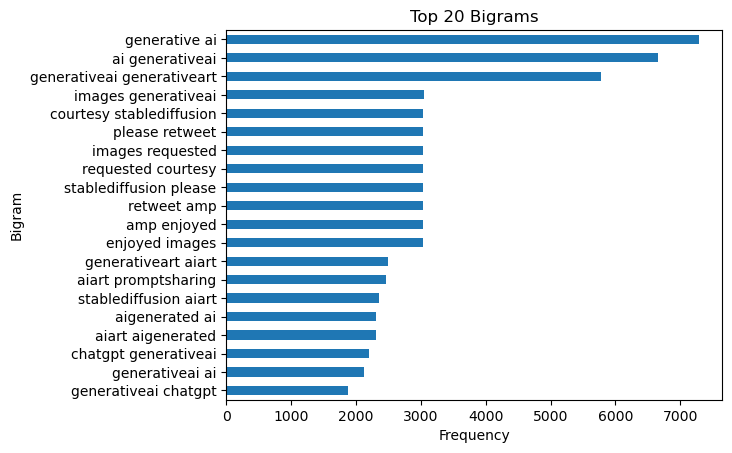

                        Bigram  Frequency
0                generative ai       7284
1              ai generativeai       6663
2   generativeai generativeart       5779
3          images generativeai       3049
4     courtesy stablediffusion       3031
5               please retweet       3031
6             images requested       3030
7           requested courtesy       3030
8       stablediffusion please       3030
9                  retweet amp       3030
10                 amp enjoyed       3030
11              enjoyed images       3030
12         generativeart aiart       2490
13         aiart promptsharing       2460
14       stablediffusion aiart       2357
15              aigenerated ai       2309
16           aiart aigenerated       2301
17        chatgpt generativeai       2203
18             generativeai ai       2123
19        generativeai chatgpt       1882


In [8]:
def get_top_n_bigrams(corpus, n=None):
    vec = Counter()
    for doc in corpus:
        bigrams = ngrams(word_tokenize(doc), 2)
        vec.update(bigrams)
    return vec.most_common(n)

top_20_bigrams = get_top_n_bigrams(df['cleaned_text'], 20)
df_top_20_bigrams = pd.DataFrame(top_20_bigrams, columns=['Bigram', 'Frequency'])
df_top_20_bigrams['Bigram'] = df_top_20_bigrams['Bigram'].apply(lambda x: ' '.join(x))

plt.figure(figsize=(10, 8))
df_top_20_bigrams.plot(kind='barh', x='Bigram', y='Frequency', legend=False)
plt.title('Top 20 Bigrams')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.gca().invert_yaxis()  
plt.show()

print(df_top_20_bigrams)

<Figure size 1000x800 with 0 Axes>

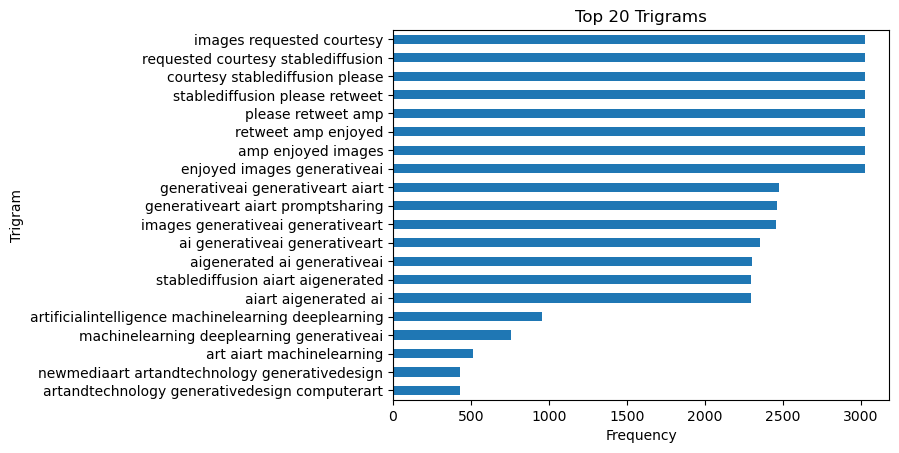

                                              Trigram  Frequency
0                           images requested courtesy       3030
1                  requested courtesy stablediffusion       3030
2                     courtesy stablediffusion please       3030
3                      stablediffusion please retweet       3030
4                                  please retweet amp       3030
5                                 retweet amp enjoyed       3030
6                                  amp enjoyed images       3030
7                         enjoyed images generativeai       3030
8                    generativeai generativeart aiart       2477
9                   generativeart aiart promptsharing       2460
10                  images generativeai generativeart       2459
11                      ai generativeai generativeart       2354
12                        aigenerated ai generativeai       2303
13                  stablediffusion aiart aigenerated       2296
14                       

In [9]:
def get_top_n_trigrams(corpus, n=None):
    vec = Counter()
    for doc in corpus:
        trigrams = ngrams(word_tokenize(doc), 3)
        vec.update(trigrams)
    return vec.most_common(n)

top_20_trigrams = get_top_n_trigrams(df['cleaned_text'], 20)
df_top_20_trigrams = pd.DataFrame(top_20_trigrams, columns=['Trigram', 'Frequency'])
df_top_20_trigrams['Trigram'] = df_top_20_trigrams['Trigram'].apply(lambda x: ' '.join(x))

plt.figure(figsize=(10, 8))
df_top_20_trigrams.plot(kind='barh', x='Trigram', y='Frequency', legend=False)
plt.title('Top 20 Trigrams')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.gca().invert_yaxis()  
plt.show()

print(df_top_20_trigrams)

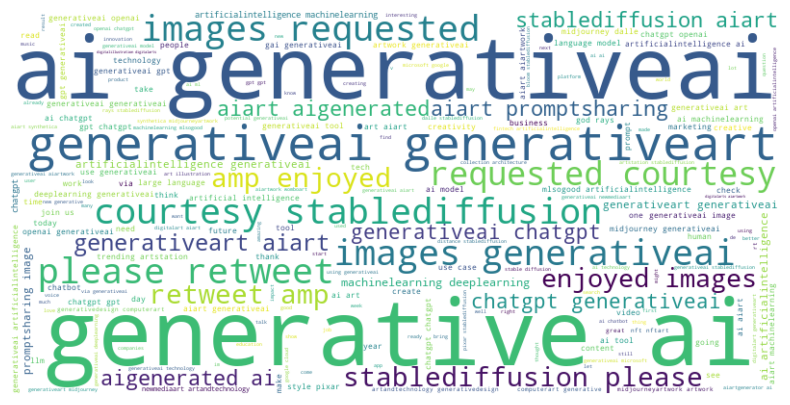

In [32]:
all_text = ' '.join(df['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<Figure size 1000x500 with 0 Axes>

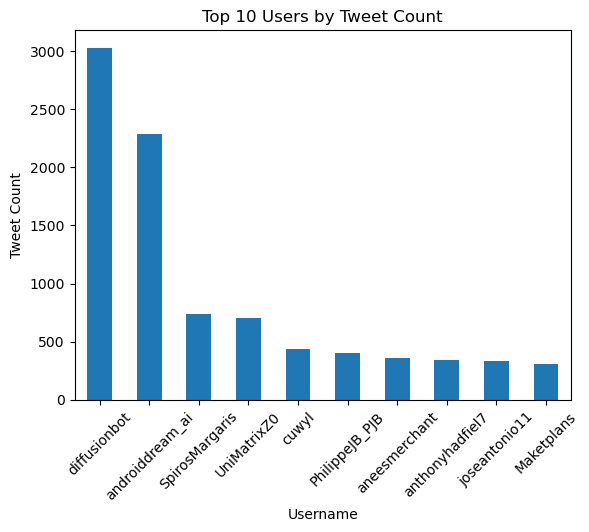

          Username  Tweet Count
0     diffusionbot         3032
1  androiddream_ai         2291
2   SpirosMargaris          738
3      UniMatrixZ0          700
4            cuwyl          432
5   PhilippeJB_PJB          398
6    aneesmerchant          359
7  anthonyhadfiel7          345
8    joseantonio11          337
9       Maketplans          310


In [10]:
top_10_users = df['Username'].value_counts().head(10)
df_top_10_users = pd.DataFrame(top_10_users).reset_index()
df_top_10_users.columns = ['Username', 'Tweet Count']

plt.figure(figsize=(10, 5))
df_top_10_users.plot(kind='bar', x='Username', y='Tweet Count', legend=False)
plt.title('Top 10 Users by Tweet Count')
plt.ylabel('Tweet Count')
plt.xlabel('Username')
plt.xticks(rotation=45)
plt.show()

print(df_top_10_users)

C:\Users\coolb\AppData\Local\Temp\ipykernel_23584\625199273.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['YearMonth'] = df['Datetime'].dt.to_period('M')


<Figure size 1000x500 with 0 Axes>

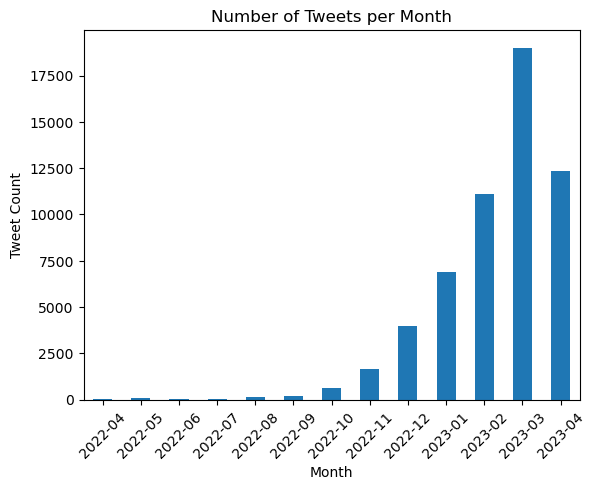

In [34]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['YearMonth'] = df['Datetime'].dt.to_period('M')

tweets_per_month = df['YearMonth'].value_counts().sort_index()
df_tweets_per_month = pd.DataFrame(tweets_per_month).reset_index()
df_tweets_per_month.columns = ['Month', 'Tweet Count']

plt.figure(figsize=(10, 5))
df_tweets_per_month.plot(kind='bar', x='Month', y='Tweet Count', legend=False)
plt.title('Number of Tweets per Month')
plt.ylabel('Tweet Count')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

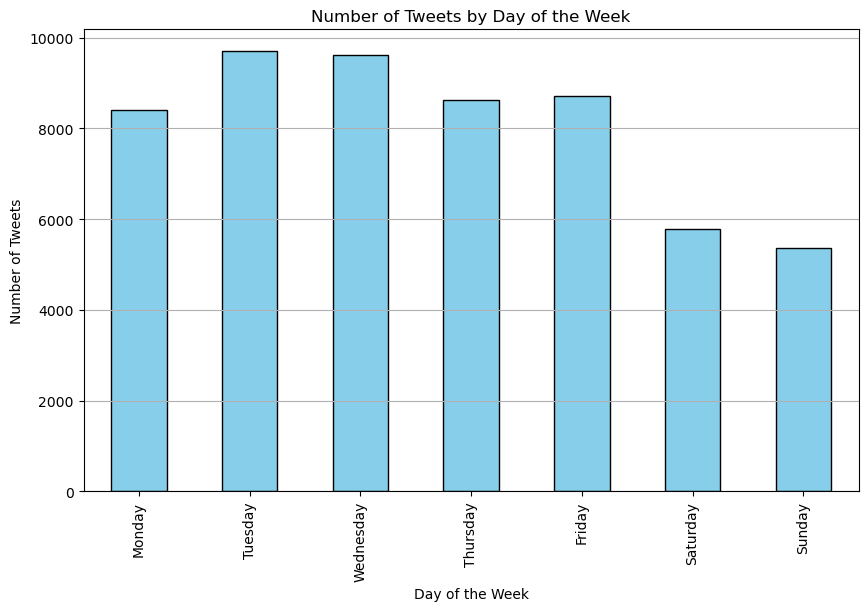

  Day of the Week  Number of Tweets
0          Monday              8400
1         Tuesday              9701
2       Wednesday              9622
3        Thursday              8625
4          Friday              8714
5        Saturday              5787
6          Sunday              5372


In [11]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['day_of_week'] = df['Datetime'].dt.dayofweek
day_name_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['day_name'] = df['day_of_week'].map(day_name_map)
tweets_per_day = df['day_name'].value_counts().reindex(day_name_map.values())
plt.figure(figsize=(10, 6))
tweets_per_day.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Tweets by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Tweets')
plt.grid(axis='y')
plt.show()

df_tweets_per_day = tweets_per_day.reset_index()
df_tweets_per_day.columns = ['Day of the Week', 'Number of Tweets']
print(df_tweets_per_day)

c:\Users\coolb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\coolb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


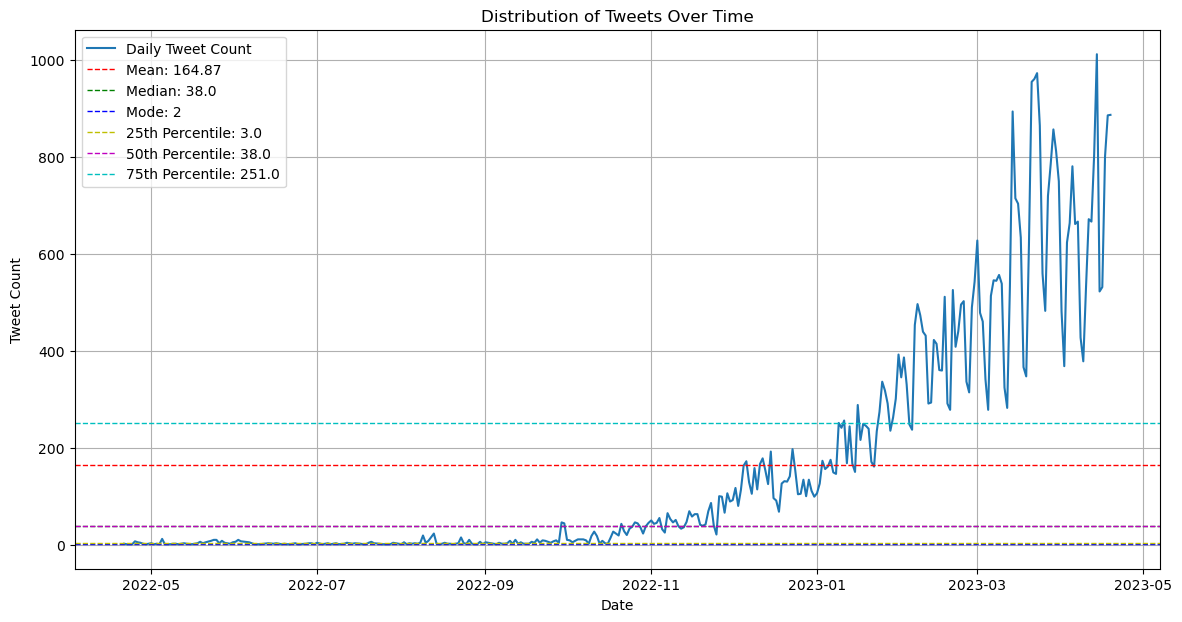


Summary Statistics for Daily Tweet Counts:
count     341.000000
mean      164.870968
std       237.970428
min         1.000000
25%         3.000000
50%        38.000000
75%       251.000000
max      1011.000000
Name: count, dtype: float64


In [59]:
import seaborn as sns

df['Datetime'] = pd.to_datetime(df['Datetime'])
df['date'] = df['Datetime'].dt.date

daily_tweet_counts = df['date'].value_counts().sort_index()
tweet_count_stats = daily_tweet_counts.describe()
mean_tweets = tweet_count_stats['mean']
median_tweets = daily_tweet_counts.median()
mode_tweets = daily_tweet_counts.mode()[0]
quartiles = tweet_count_stats[['25%', '50%', '75%']]

plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_tweet_counts, label='Daily Tweet Count')
plt.axhline(mean_tweets, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {mean_tweets:.2f}')
plt.axhline(median_tweets, color='g', linestyle='dashed', linewidth=1, label=f'Median: {median_tweets}')
plt.axhline(mode_tweets, color='b', linestyle='dashed', linewidth=1, label=f'Mode: {mode_tweets}')
plt.axhline(quartiles['25%'], color='y', linestyle='dashed', linewidth=1, label=f'25th Percentile: {quartiles["25%"]}')
plt.axhline(quartiles['50%'], color='m', linestyle='dashed', linewidth=1, label=f'50th Percentile: {quartiles["50%"]}')
plt.axhline(quartiles['75%'], color='c', linestyle='dashed', linewidth=1, label=f'75th Percentile: {quartiles["75%"]}')
plt.title('Distribution of Tweets Over Time')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.legend()
plt.grid(True)
plt.show()

print(f"\nSummary Statistics for Daily Tweet Counts:\n{tweet_count_stats}")

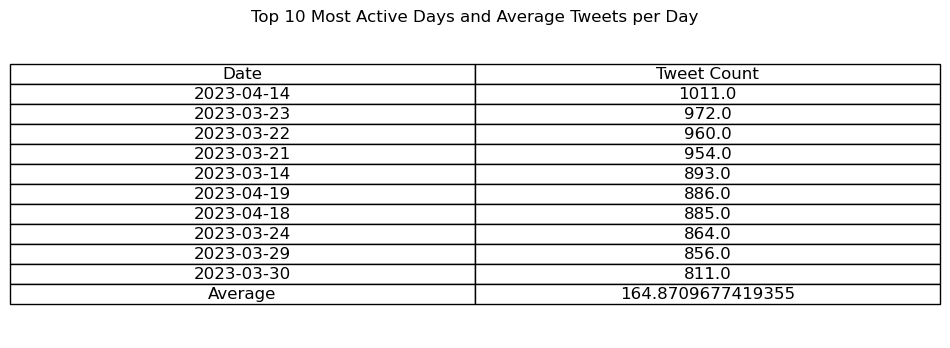

          Date  Tweet Count
0   2023-04-14  1011.000000
1   2023-03-23   972.000000
2   2023-03-22   960.000000
3   2023-03-21   954.000000
4   2023-03-14   893.000000
5   2023-04-19   886.000000
6   2023-04-18   885.000000
7   2023-03-24   864.000000
8   2023-03-29   856.000000
9   2023-03-30   811.000000
10     Average   164.870968


In [61]:
most_active_days = df['date'].value_counts().head(10)
most_active_days_df = most_active_days.reset_index()
most_active_days_df.columns = ['Date', 'Tweet Count']

average_tweets_per_day = df['date'].value_counts().mean()
average_row = pd.DataFrame([['Average', average_tweets_per_day]], columns=['Date', 'Tweet Count'])
most_active_days_df = pd.concat([most_active_days_df, average_row], ignore_index=True)

plt.figure(figsize=(10, 4))
plt.axis('tight')
plt.axis('off')
table = plt.table(cellText=most_active_days_df.values, colLabels=most_active_days_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
plt.title('Top 10 Most Active Days and Average Tweets per Day')
plt.show()

print(most_active_days_df)

c:\Users\coolb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


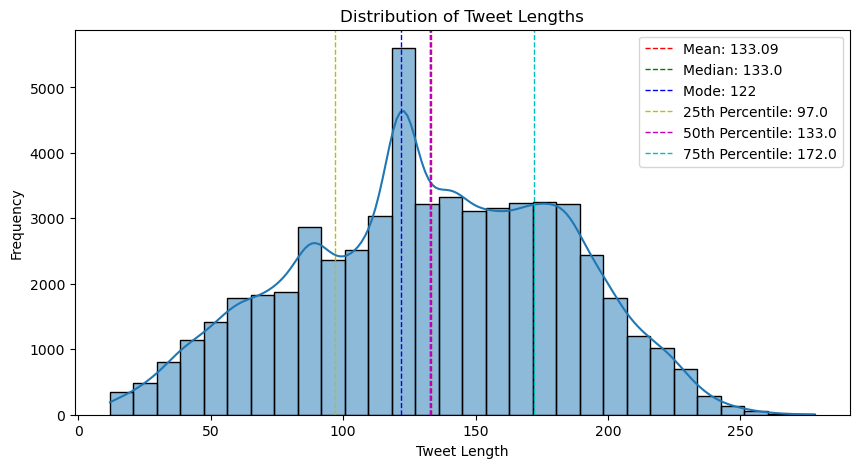


Summary Statistics for Tweet Lengths:
count    56221.000000
mean       133.087690
std         49.621045
min         12.000000
25%         97.000000
50%        133.000000
75%        172.000000
max        278.000000
Name: tweet_length, dtype: float64


In [56]:
df['tweet_length'] = df['cleaned_text'].apply(len)
tweet_length_stats = df['tweet_length'].describe()
mean_length = tweet_length_stats['mean']
median_length = df['tweet_length'].median()
mode_length = df['tweet_length'].mode()[0]
quartiles = tweet_length_stats[['25%', '50%', '75%']]

plt.figure(figsize=(10, 5))
sns.histplot(df['tweet_length'], bins=30, kde=True, edgecolor='black')
plt.axvline(mean_length, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {mean_length:.2f}')
plt.axvline(median_length, color='g', linestyle='dashed', linewidth=1, label=f'Median: {median_length}')
plt.axvline(mode_length, color='b', linestyle='dashed', linewidth=1, label=f'Mode: {mode_length}')
plt.axvline(quartiles['25%'], color='y', linestyle='dashed', linewidth=1, label=f'25th Percentile: {quartiles["25%"]}')
plt.axvline(quartiles['50%'], color='m', linestyle='dashed', linewidth=1, label=f'50th Percentile: {quartiles["50%"]}')
plt.axvline(quartiles['75%'], color='c', linestyle='dashed', linewidth=1, label=f'75th Percentile: {quartiles["75%"]}')

plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print(f"\nSummary Statistics for Tweet Lengths:\n{tweet_length_stats}")

<Figure size 1000x500 with 0 Axes>

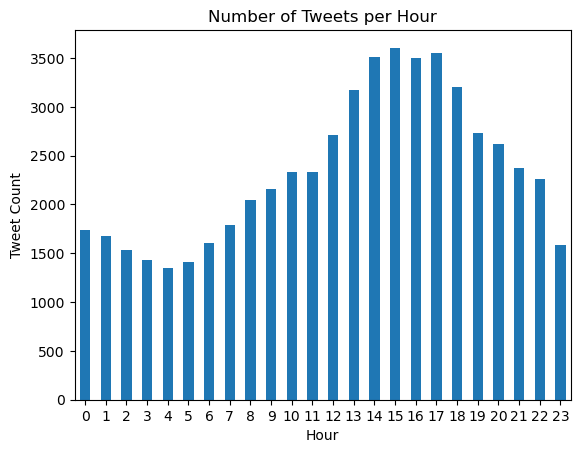

    Hour  Tweet Count
0      0         1742
1      1         1679
2      2         1534
3      3         1435
4      4         1348
5      5         1414
6      6         1602
7      7         1792
8      8         2048
9      9         2153
10    10         2332
11    11         2334
12    12         2709
13    13         3168
14    14         3511
15    15         3605
16    16         3503
17    17         3547
18    18         3202
19    19         2728
20    20         2620
21    21         2370
22    22         2262
23    23         1583


In [12]:
df['Hour'] = df['Datetime'].dt.hour
tweets_per_hour = df['Hour'].value_counts().sort_index()
df_tweets_per_hour = pd.DataFrame(tweets_per_hour).reset_index()
df_tweets_per_hour.columns = ['Hour', 'Tweet Count']

plt.figure(figsize=(10, 5))
df_tweets_per_hour.plot(kind='bar', x='Hour', y='Tweet Count', legend=False)
plt.title('Number of Tweets per Hour')
plt.ylabel('Tweet Count')
plt.xlabel('Hour')
plt.xticks(rotation=0)
plt.show()

print(df_tweets_per_hour)